# Image Classification with Autogluon`s AutoMM

- Here, I used AutoGluon's AutoMM to classify the images.

- With only 30 minutes of training, the model achieved 99.03% accuracy on the test dataset.
    - This result ranks within the top 8% of models and is only 0.47% lower than the best model from publicly available sources (see [here](https://paperswithcode.com/sota/image-classification-on-cifar-10)).

# Table of Contents
1. [Packages and Data Importation](#Packages-and-Data-Importation)
2. [Model](#Model)
3. [Analysis of Misclassified Images and Label Noise](#Analysis-of-Misclassified-Images-and-Label-Noise)

# Packages and Data Importation
I chose to import the data from `Keras` to practice importing data from other sources and converting it into the format required by `AutoMM`.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from autogluon.multimodal import MultiModalPredictor

from PIL import Image

from tensorflow.keras.datasets import cifar10

from src.config import AUTOGLUON_MODEL

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define directories to save images
train_dir = "cifar10_train"
test_dir = "cifar10_test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to save images to disk
def save_images(images, labels, directory):
    paths = []
    for i, (image, label) in enumerate(zip(images, labels)):
        # Convert numpy array to PIL image
        img = Image.fromarray(image)
        # Save image to disk
        img_path = os.path.join(directory, f"{i}.png")
        img.save(img_path)
        paths.append(img_path)
    return paths

# Save training and test images
train_paths = save_images(x_train, y_train, train_dir)
test_paths = save_images(x_test, y_test, test_dir)

# Create DataFrames for AutoGluon
train_df = pd.DataFrame({"image": train_paths, "label": y_train.flatten()})
test_df = pd.DataFrame({"image": test_paths, "label": y_test.flatten()})

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Model

In [16]:
# Initialize the predictor
predictor = MultiModalPredictor(
    label="label", 
    problem_type="multiclass", 
    path=MODELS_FOLDER  
)

# Train the model
predictor.fit(
    train_data=train_df, 
    time_limit=1800  
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250214_122112"
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.5.1+cu124
CUDA Version:       12.4
Memory Avail:       6.95 GB / 12.67 GB (54.9%)
Disk Space Avail:   77.23 GB / 112.64 GB (68.6%)

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/AutogluonModels/ag-20250214_122112
    ```

INFO: Seed set to 0
GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: Tesla T4
GPU 0 Memory: 0.41GB/15.0GB (Used/Total)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU co

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 185: 'val_accuracy' reached 0.98880 (best 0.98880), saving model to '/content/AutogluonModels/ag-20250214_122112/epoch=0-step=185.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 372: 'val_accuracy' reached 0.98960 (best 0.98960), saving model to '/content/AutogluonModels/ag-20250214_122112/epoch=0-step=372.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:30:00. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 405: 'val_accuracy' reached 0.98920 (best 0.98960), saving model to '/content/AutogluonModels/ag-20250214_122112/epoch=1-step=405.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.
/usr/local/lib/python3.11/dist-packages/autogluon/multimodal/learners/base.py:2117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you sta

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

In [17]:
# Evaluate the model
eval_result = predictor.evaluate(test_df)
print("Evaluation Results:", eval_result)

Predicting: |          | 0/? [00:00<?, ?it/s]

Evaluation Results: {'accuracy': 0.9903}


# Analysis of Misclassified Images and Label Noise
To illustrate the results, I selected the 20 images with the lowest predicted probabilities for the correct class and plotted them alongside their true labels and the predicted probabilities for the highest class.

CIFAR-10 contains 0.54% of images in the test dataset that are mislabeled (Northcutt et al., 2021). In the figure below, it is possible to observe some of these mislabeled examples, such as the first and last pictures.

In [19]:
# Get predicted probabilities and labels
pred_proba = predictor.predict_proba(test_df)  # Predicted probabilities for each class
pred_labels = predictor.predict(test_df)       # Predicted labels

# Get true labels
true_labels = test_df["label"].values

# Find misclassified cases
misclassified_indices = np.where(pred_labels != true_labels)[0]

# Get the probability of the true class for misclassified cases
true_class_probs = pred_proba.to_numpy()[misclassified_indices, true_labels[misclassified_indices]]

# Sort misclassified cases by the probability of the true class (ascending order)
worst_indices = misclassified_indices[np.argsort(true_class_probs)[:20]]  # Top 20 worst cases

# Print the worst cases
print("Indices of the 20 worst misclassified cases:", worst_indices)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Indices of the 20 worst misclassified cases: [2405 4965 8872 9039 3560 3708 2592 4964  226 2804 2854 5458 6202  275
 1492 5730 9034 7002 4276 7524]


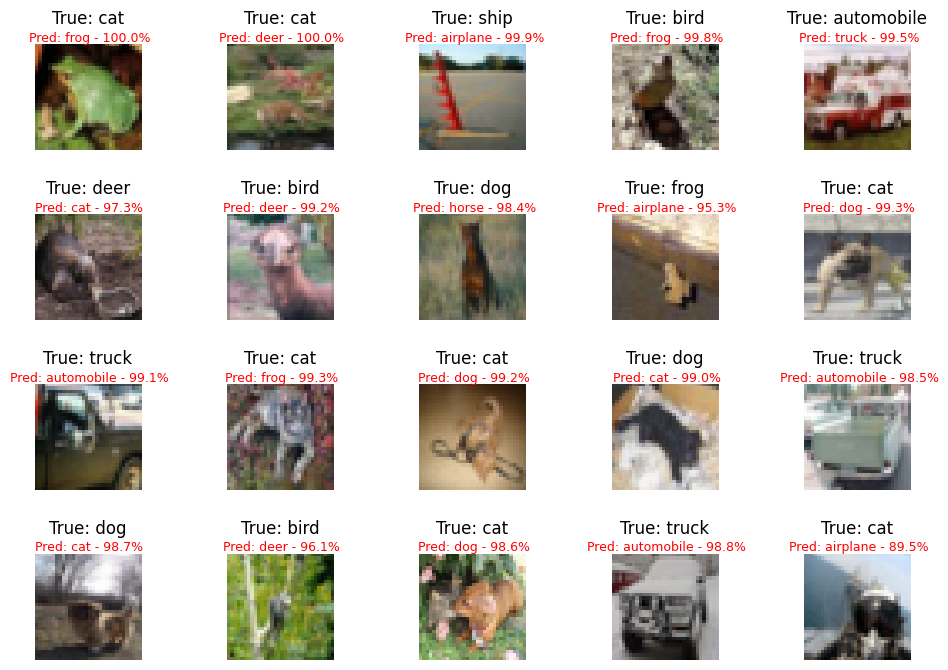

In [20]:
# Define class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Create a figure and axes
fig, axs = plt.subplots(4, 5, figsize=(12, 8))

# Loop through the worst 20 indices and plot the images
for i, ax in enumerate(axs.flat):
    # Get the index of the worst case
    idx = worst_indices[i]

    # Display the image
    ax.imshow(x_test[idx])
    ax.set_title(f"True: {class_names[true_labels[idx]]}", pad=15)
    ax.axis("off")

    # Get the predicted class and confidence
    predicted_class = pred_labels[idx]
    confidence = pred_proba.iloc[idx].max()  # Confidence of the predicted class

    # Add prediction text to the plot
    ax.text(
        16,
        -2.5,
        f"Pred: {class_names[predicted_class]} - {confidence:.1%}",
        color="green" if predicted_class == true_labels[idx] else "red",
        verticalalignment="center",
        horizontalalignment="center",
        fontsize=9,
    )

# Adjust layout and display the plot
fig.subplots_adjust(hspace=0.6)
plt.show()

## References


Northcutt, Curtis G., Anish Athalye, and Jonas Mueller. "Pervasive label errors in test sets destabilize machine learning benchmarks." arXiv preprint arXiv:2103.14749 (2021).